In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Funzione per generare prezzi casuali secondo una distribuzione di probabilità
def generate_prices(distribution, N):
    prices = [100]  # Prezzo iniziale
    for _ in range(1, N):
        change = np.random.choice(list(distribution.keys()), p=list(distribution.values()))
        new_price = prices[-1] * change
        prices.append(new_price)
    return prices

# def max_decimal_places(distribution):
#     max_decimals = 0
#     for key in distribution.keys():
#         # Converte il numero in una stringa e conta i decimali (dopo il punto decimale)
#         decimals = str(key)[::-1].find('.')
#         if decimals != -1:
#             max_decimals = max(max_decimals, decimals)
#     return max_decimals

def multinomial_probability(distribution, counts_temp):
    # Calcoliamo N, il numero totale di variazioni di prezzo osservate
    N = sum(counts_temp.values())
    
    # Calcoliamo il fattoriale di N
    N_factorial = math.factorial(N)
    
    # Calcoliamo il denominatore (prodotto dei fattoriali dei conteggi) 
    # e il prodotto delle probabilità elevate ai conteggi
    denominator = 1
    probability_product = 1.0
    
    for variation, count in counts_temp.items():
        denominator *= math.factorial(count)
        probability_product *= distribution[variation] ** count
    
    # Calcoliamo la probabilità utilizzando la formula del multinomiale
    probability = N_factorial / denominator * probability_product
    
    return probability

def calculate_probabilities_personal(prices, distribution):
    # Contiamo quante volte si è verificato ogni cambiamento di prezzo
    counts = {change: 0 for change in distribution.keys()}
    
    for i in range(1, len(prices)):
        # price_change = prices[i] / prices[i-1]
        # Trovare il cambio più vicino in distribuzione
        for change in distribution.keys():
            # if abs(price_change - change) < tolerance:
            if change*prices[i-1] == prices[i]:
                counts[change] += 1
                break
    
    # Calcoliamo le probabilità a posteriori utilizzando l'approccio bayesiano
    updated_distribution = {}
    
    for change in distribution.keys():
        counts_temp = counts.copy()
        # if abs(price_change - change) < tolerance:
        counts_temp[change] += 1
        # Ora mi chiedo a posteriori qual era la probabilità che la lista dei prezzi diventasse questa
        updated_distribution[change] = multinomial_probability(distribution, counts_temp)

    return updated_distribution
    

def simulate_trading(capital, tokens, prices, distribution):
    portfolio_values = [capital]  # Valore del portafoglio nel tempo
    transactions = []

    for i in range(1, len(prices)):
        for change in distribution.keys():
                if change*prices[i-1] == prices[i]:
                    change_happened = change
        # Calcoliamo la distribuzione aggiornata per il giorno successivo
        updated_distribution = calculate_probabilities_personal(prices[:i+1], distribution)
        
        # Normalizziamo updated_distribution
        total_prob = sum(updated_distribution.values())
        updated_distribution_normalized = {k: v / total_prob for k, v in updated_distribution.items()}
        
        # Troviamo la chiave con la probabilità massima
        max_key = max(updated_distribution_normalized, key=updated_distribution_normalized.get)
        
        # Calcoliamo i valori attesi
        # expected_values = {k: updated_distribution_normalized[k] * k for k in updated_distribution.keys()}
        
        # Normalizziamo i valori attesi
        # total_expected_value = sum(expected_values.values())
        # expected_values_normalized = {k: v / total_expected_value for k, v in expected_values.items()}

        print('updated_distribution:', updated_distribution)
        print('updated_distribution_normalized:', updated_distribution_normalized)
        print('max_key:', max_key)
        # print('expected_values:', expected_values)
        # print('expected_values_normalized:', expected_values_normalized)
        print('\n')
        
        
        # Decidiamo se comprare o vendere
        if max_key > 1:
            # Comprare
            amount_to_spend = capital * updated_distribution_normalized[max_key]
            tokens_bought = amount_to_spend / prices[i]
            previous_capital = capital
            capital -= amount_to_spend
            tokens += tokens_bought
            if amount_to_spend > 0:
                transactions.append((i, capital, tokens, prices[i], change_happened, 'Acquisto', amount_to_spend, tokens_bought, amount_to_spend/previous_capital, tokens*prices[i] + capital, max_key, updated_distribution_normalized[max_key]))
            else:
                transactions.append((i, capital, tokens, prices[i], change_happened, '-', 0, 0, 0, tokens*prices[i] + capital, max_key, updated_distribution_normalized[max_key]))
        else:
            # Vendere
            tokens_to_sell = tokens * updated_distribution_normalized[max_key]
            amount_gained = tokens_to_sell * prices[i]
            previous_tokens = tokens
            tokens -= tokens_to_sell
            capital += amount_gained
            if tokens_to_sell > 0:
                transactions.append((i, capital, tokens, prices[i], change_happened, 'Vendita', amount_gained, tokens_to_sell, tokens_to_sell/previous_tokens, tokens*prices[i] + capital, max_key, updated_distribution_normalized[max_key]))
            else:
                transactions.append((i, capital, tokens, prices[i], change_happened, '-', 0, 0, 0, tokens*prices[i] + capital, max_key, updated_distribution_normalized[max_key]))
        
        # Calcoliamo il valore del portafoglio
        portfolio_value = capital + tokens * prices[i]
        portfolio_values.append(portfolio_value)
    
    return portfolio_values, transactions

updated_distribution: {0.5: 0.5, 1.5: 0.25}
updated_distribution_normalized: {0.5: 0.6666666666666666, 1.5: 0.3333333333333333}
max_key: 0.5


updated_distribution: {0.5: 0.375, 1.5: 0.125}
updated_distribution_normalized: {0.5: 0.75, 1.5: 0.25}
max_key: 0.5


updated_distribution: {0.5: 0.25, 1.5: 0.0625}
updated_distribution_normalized: {0.5: 0.8, 1.5: 0.2}
max_key: 0.5


updated_distribution: {0.5: 0.15625, 1.5: 0.03125}
updated_distribution_normalized: {0.5: 0.8333333333333334, 1.5: 0.16666666666666666}
max_key: 0.5


updated_distribution: {0.5: 0.09375, 1.5: 0.015625}
updated_distribution_normalized: {0.5: 0.8571428571428571, 1.5: 0.14285714285714285}
max_key: 0.5


updated_distribution: {0.5: 0.1640625, 1.5: 0.0546875}
updated_distribution_normalized: {0.5: 0.75, 1.5: 0.25}
max_key: 0.5


updated_distribution: {0.5: 0.21875, 1.5: 0.109375}
updated_distribution_normalized: {0.5: 0.6666666666666666, 1.5: 0.3333333333333333}
max_key: 0.5


updated_distribution: {0.5: 0.1640625, 1.5:

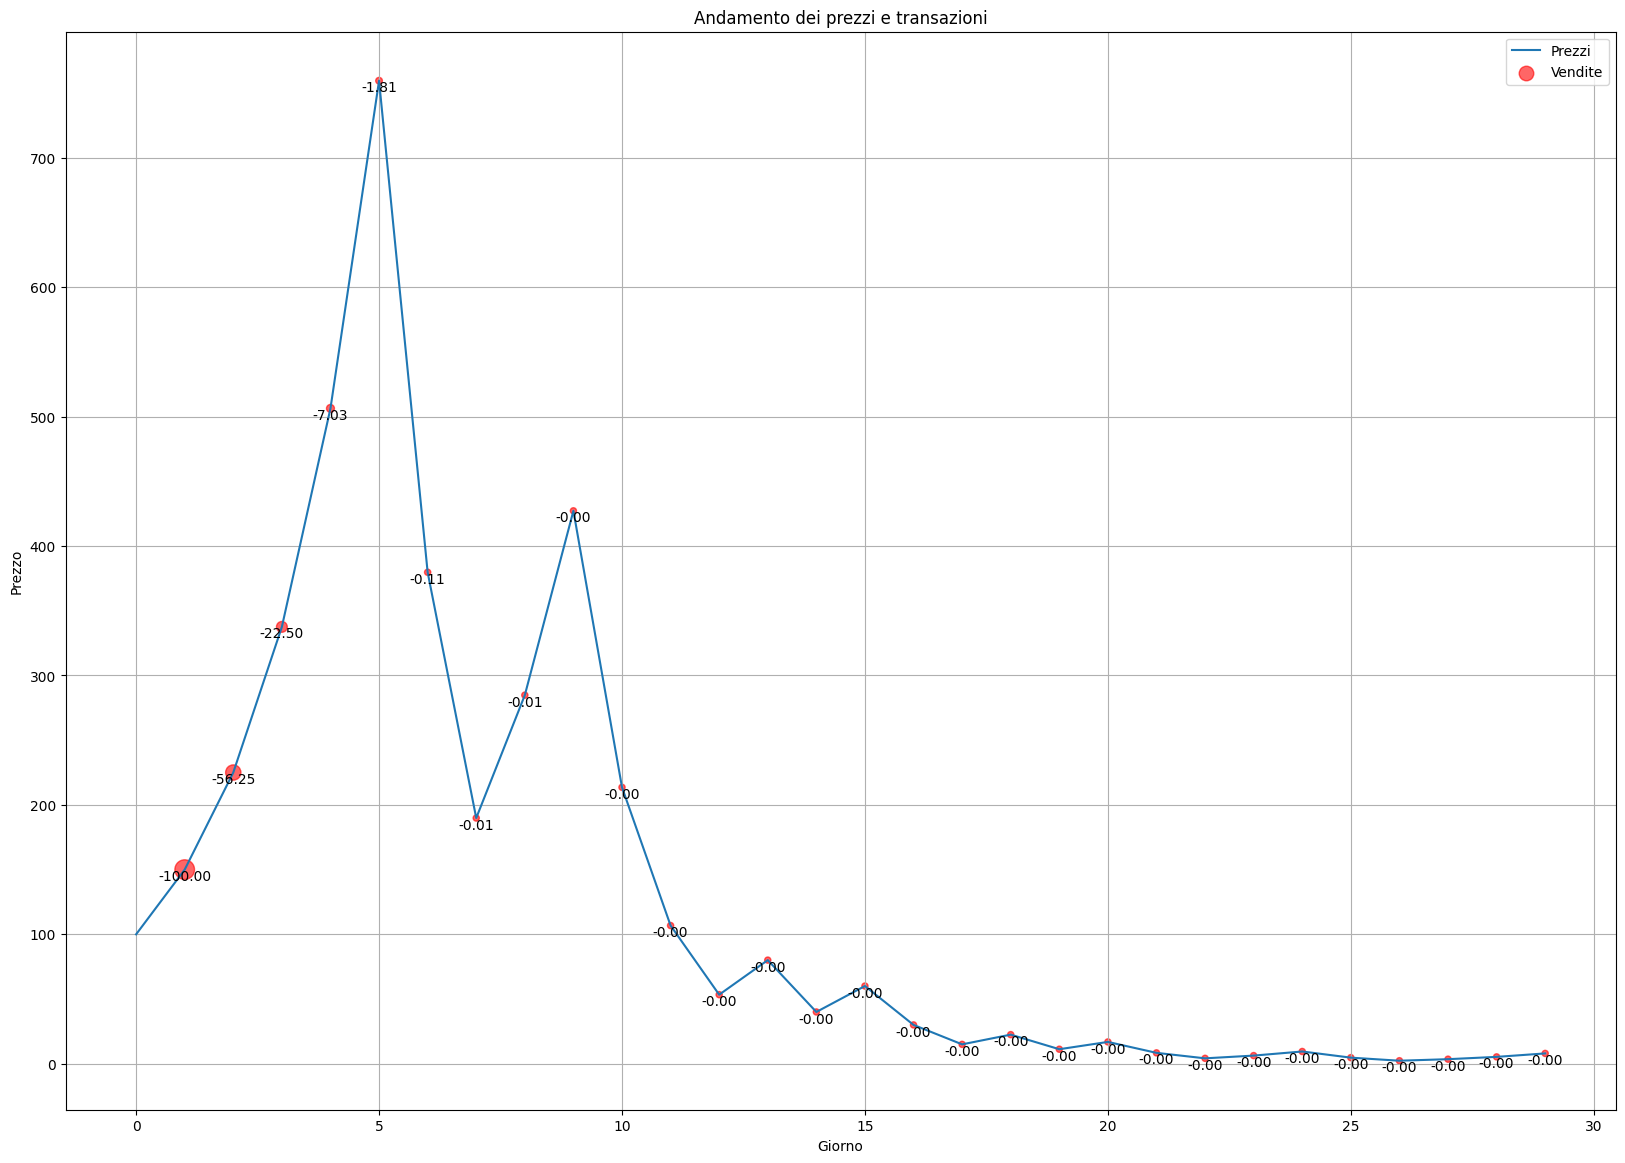

Rendimento totale del portafoglio: 1.1877249821698619


,Giorno,Liquidità posseduta (€),Token posseduti,Prezzo (€),Variazione avvenuta,Tipo,Quantità (€),Quantità (token),% comprata/venduta,Portafoglio totale (€),Variazione più probabile,Probabilità normalizzata della variazione più probabile
0,1,1100.000000,3.333333e-01,150.000000,1.5,Vendita,1.000000e+02,6.666667e-01,0.666667,1150.000000,0.5,0.666667
1,2,1156.250000,8.333333e-02,225.000000,1.5,Vendita,5.625000e+01,2.500000e-01,0.750000,1175.000000,0.5,0.750000
2,3,1178.750000,1.666667e-02,337.500000,1.5,Vendita,2.250000e+01,6.666667e-02,0.800000,1184.375000,0.5,0.800000
3,4,1185.781250,2.777778e-03,506.250000,1.5,Vendita,7.031250e+00,1.388889e-02,0.833333,1187.187500,0.5,0.833333
4,5,1187.589286,3.968254e-04,759.375000,1.5,Vendita,1.808036e+00,2.380952e-03,0.857143,1187.890625,0.5,0.857143
5,6,1187.702288,9.920635e-05,379.687500,0.5,Vendita,1.130022e-01,2.976190e-04,0.750000,1187.739955,0.5,0.750000
6,7,1187.714844,3.306878e-05,189.843750,0.5,Vendita,1.255580e-02,6.613757e-05,0.666667,1187.721122,0.5,0.666667
7,8,1187.721436,9.920635e-06,284.765625,1.5,Vendita,6.591797e-03,2.314815e-05,0.700000,1187.724261,0.5,0.700000
8,9,1187.724517,2.705628e-06,427.148438,1.5,Vendita,3.081879e-03,7.215007e-06,0.727273,1187.725673,0.5,0.727273
9,10,1187.724903,9.018759e-07,213.574219,0.5,Vendita,3.852349e-04,1.803752e-06,0.666667,1187.725095,0.5,0.666667


In [3]:
# Configurazione della distribuzione e del numero di giorni
# distribution = {0.01: 0.02, 0.3: 0.13, 0.5: 0.1, 0.9: 0.3, 1.1: 0.25, 1.5: 0.09, 2: 0.1, 200: 0.01}
distribution = {0.5:0.5, 1.5:0.5}
N = 30 # Numero di giorni
initial_capital = 1000
initial_tokens = 1

# Generazione dei prezzi e simulazione
prices = generate_prices(distribution, N)
portfolio_values, transactions = simulate_trading(initial_capital, initial_tokens, prices, distribution)

# Preparazione dei dati per il grafico
columns = ['Giorno', 'Liquidità posseduta (€)', 'Token posseduti', 'Prezzo (€)', 'Variazione avvenuta', 'Tipo', 'Quantità (€)', 'Quantità (token)', '% comprata/venduta', 'Portafoglio totale (€)', 'Variazione più probabile', 'Probabilità normalizzata della variazione più probabile']
df_transazioni = pd.DataFrame(transactions, columns=columns)

# Filtrare acquisti e vendite
acquisti = df_transazioni[df_transazioni['Tipo'] == 'Acquisto']
vendite = df_transazioni[df_transazioni['Tipo'] == 'Vendita']

# Calcolo delle dimensioni dei punti
max_acquisto = acquisti['Quantità (€)'].max() if not acquisti.empty else 0
max_vendita = vendite['Quantità (€)'].max() if not vendite.empty else 0

def calcola_dimensione(quantita, max_quantita, min_size=20, max_size=200):
    return min_size + (max_size - min_size) * (quantita / max_quantita) if max_quantita > 0 else min_size

dimensioni_acquisti = [calcola_dimensione(x, max_acquisto) for x in acquisti['Quantità (€)']] if not acquisti.empty else []
dimensioni_vendite = [calcola_dimensione(x, max_vendita) for x in vendite['Quantità (€)']] if not vendite.empty else []

# Creazione del grafico
plt.figure(figsize=(20, 14))
plt.grid()
plt.plot(range(N), prices, label='Prezzi')

if not acquisti.empty:
    plt.scatter(acquisti['Giorno'], acquisti['Prezzo (€)'], s=dimensioni_acquisti, color='green', alpha=0.6, label='Acquisti')
    for i, row in acquisti.iterrows():
        plt.text(row['Giorno'], row['Prezzo (€)'], f"+{row['Quantità (€)']:.2f}", color='black', ha='center', va='bottom')

if not vendite.empty:
    plt.scatter(vendite['Giorno'], vendite['Prezzo (€)'], s=dimensioni_vendite, color='red', alpha=0.6, label='Vendite')
    for i, row in vendite.iterrows():
        plt.text(row['Giorno'], row['Prezzo (€)'], f"-{row['Quantità (€)']:.2f}", color='black', ha='center', va='top')

plt.xlabel('Giorno')
plt.ylabel('Prezzo')
plt.title('Andamento dei prezzi e transazioni')
plt.legend()
plt.show()

# Mostra il rendimento totale del portafoglio
print(f"Rendimento totale del portafoglio: {portfolio_values[-1] / portfolio_values[0]}")

# Stampa del dataframe delle transazioni
df_transazioni

In [4]:
def calcola_rendimento_portafoglio_ideale(capitale_iniziale, bitcoin_iniziali, lista_prezzi, min_acquisto, min_vendita, perc_commissione_acquisto, perc_commissione_vendita):
    capitale = capitale_iniziale
    bitcoin = bitcoin_iniziali
    comprato = False

    for i in range(len(lista_prezzi) - 1):
        # Compra al minimo
        if lista_prezzi[i] < lista_prezzi[i + 1] and not comprato and capitale >= min_acquisto:
            bitcoin_acquistati = (capitale * (1 - perc_commissione_acquisto)) / lista_prezzi[i]
            bitcoin += bitcoin_acquistati
            capitale = 0
            comprato = True
            # print(f'Bitcoin posseduti: {bitcoin}')
        # Vende al massimo
        elif lista_prezzi[i] > lista_prezzi[i + 1] and comprato and bitcoin * lista_prezzi[i] >= min_vendita:
            capitale_vendita = bitcoin * lista_prezzi[i] * (1 - perc_commissione_vendita)
            capitale += capitale_vendita
            bitcoin = 0
            comprato = False
            # print(f'Capitale posseduto: {capitale}')

    # Vende i bitcoin rimasti all'ultimo prezzo
    if comprato and bitcoin * lista_prezzi.iloc[-1] >= min_vendita:
        capitale += bitcoin * lista_prezzi.iloc[-1] * (1 - perc_commissione_vendita)
        bitcoin = 0
        # print(f'Capitale posseduto: {capitale}')
        # print(f'Bitcoin posseduti: {bitcoin}')

    valore_iniziale = capitale_iniziale + bitcoin_iniziali * lista_prezzi[0]
    valore_finale = capitale + bitcoin * lista_prezzi.iloc[-1]

    rendimento = valore_finale / valore_iniziale

    return [rendimento, valore_finale]

In [5]:
rendimento_ideale = calcola_rendimento_portafoglio_ideale(df_transazioni['Liquidità posseduta (€)'].iloc[0], df_transazioni['Token posseduti'].iloc[0], df_transazioni['Prezzo (€)'], 0, 0, 0, 0)[0]
punteggio_rendimento = df_transazioni['Portafoglio totale (€)'].iloc[-1] / df_transazioni['Portafoglio totale (€)'].iloc[0] / rendimento_ideale
print('Rendimento ideale:', rendimento_ideale)
print('Punteggio rendimento:', str(round(punteggio_rendimento*100, 2)) + '%')

Rendimento ideale: 437.8938903808594
Punteggio rendimento: 0.24%


In [6]:
expected_values = {6:0.5*6, 400:0.01*400, 10:0.49*10}
        
# Troviamo la chiave con il valore atteso massimo
max_expected_value_key = max(expected_values, key=expected_values.get)
max_expected_value = expected_values[max_expected_value_key]
max_expected_value

4.9

In [7]:
calculate_probabilities_personal(prices, distribution)

{0.5: 0.13543542008846998, 1.5: 0.11153505183756351}

In [8]:
distribution = {0.5: 0.9, 2: 0.1}
prices = [100, 50, 25, 12.5, 6.25] # generate_prices(distribution, 2)
print(prices)
calculate_probabilities_personal(prices, distribution)

[100, 50, 25, 12.5, 6.25]


{0.5: 0.5904900000000001, 2: 0.32805}

In [9]:
# Esempio di utilizzo:
distribution = {
    0.3: 0.70,
    1.2: 0.20,
    4.0: 0.10
}

counts_temp = {
    0.3: 4,
    1.2: 3,
    4.0: 3
}

result = multinomial_probability(distribution, counts_temp)
print(f"La probabilità della serie storica di variazioni di prezzo è: {result}")

La probabilità della serie storica di variazioni di prezzo è: 0.008067360000000003
